# Heart Attack Predictions

<img src="https://drive.google.com/uc?export=download&id=1M10J_fLbeNR7qHz1ffAFHRw-JsE3FpH9">

Given medical data collected on patients, let's predict if a person has a risk of heart attack.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


The data is entirely numerical and there is no missing values. It only remains to split and scale the data.

# Preprocessing

In [3]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Split X and y
    X = df.drop('output', axis=1)
    y = df['output']
    
    # Train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
74,-1.327733,-1.436416,0.985842,-0.574125,-0.632674,-0.418040,0.901639,0.656262,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
153,1.249032,-1.436416,0.985842,0.831066,0.585437,-0.418040,-0.979367,0.094007,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
64,0.352766,0.696177,0.985842,0.479768,-0.670155,2.392117,-0.979367,0.656262,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
296,0.912932,-1.436416,-0.922749,-0.457026,-0.932517,-0.418040,0.901639,-0.597999,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
287,0.240733,0.696177,0.031547,1.299463,-0.276611,-0.418040,-0.979367,0.613011,-0.709299,-0.892493,0.955779,0.265165,-0.464729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.327733,0.696177,-0.922749,0.011371,0.004491,2.392117,-0.979367,-0.295246,1.409842,-0.808551,-0.661693,3.181981,1.141906
192,-0.095367,0.696177,-0.922749,-0.691224,-1.101178,-0.418040,0.901639,-1.592757,-0.709299,0.282698,-0.661693,0.265165,1.141906
117,0.128699,0.696177,1.940138,-0.691224,-1.007478,-0.418040,-0.979367,0.526511,-0.709299,0.702409,-0.661693,-0.707107,1.141906
47,-0.879600,0.696177,0.985842,0.362669,0.191893,-0.418040,-0.979367,0.267008,-0.709299,-0.892493,0.955779,-0.707107,-0.464729


# Training

In [5]:
models = {
    "Logistic": LogisticRegression(),
    "   KNN  ": KNeighborsClassifier(),
    "   RF   ": RandomForestClassifier(),
    "   MLP  ": RandomForestClassifier(),
    "   SVC  ": SVC(probability=True),
}

print("-------- Training --------")
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained!")
print("---------- Done ----------")

-------- Training --------
Logistic trained!
   KNN   trained!
   RF    trained!
   MLP   trained!
   SVC   trained!
---------- Done ----------


# Results

In [6]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + "    Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
    print("            F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
    print("              Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
    print("           Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
    print("-----------------------------")
    results.append(confusion_matrix(y_test, y_pred))

Logistic    Accuracy: 85.25 %
            F1 Score: 87.32 %
              Recall: 91.18 %
           Precision: 83.78 %
-----------------------------
   KNN      Accuracy: 81.97 %
            F1 Score: 84.06 %
              Recall: 85.29 %
           Precision: 82.86 %
-----------------------------
   RF       Accuracy: 88.52 %
            F1 Score: 89.86 %
              Recall: 91.18 %
           Precision: 88.57 %
-----------------------------
   MLP      Accuracy: 85.25 %
            F1 Score: 86.57 %
              Recall: 85.29 %
           Precision: 87.88 %
-----------------------------
   SVC      Accuracy: 86.89 %
            F1 Score: 88.89 %
              Recall: 94.12 %
           Precision: 84.21 %
-----------------------------


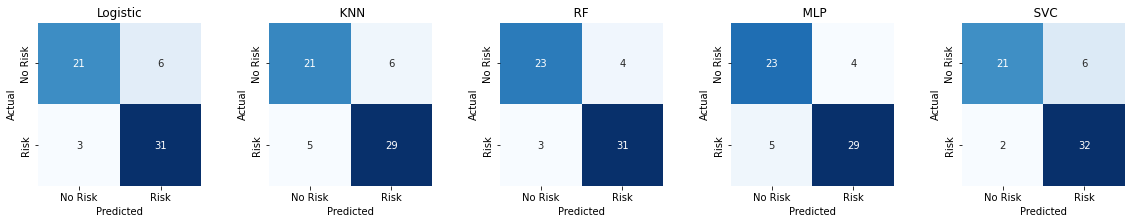

In [7]:
# Confusion matrices
plt.figure(figsize=(20, 3))

for i, name in enumerate(list(models.keys())):
    plt.subplot(1, 5, i + 1)
    sns.heatmap(results[i], annot=True, square=True, cbar=False,
                xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'], cmap='Blues')
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

In this case, it is better to maximize the recall because we do not want to leave people at risk of heart attack unattended.

We try to minimize the false negative number.

The cost of acting is not the most important. Prevention is better than cure.

The best model is the Support Vector Classification.

# Impact of Voting Classifier

After it was suggested to me in the comments to use a voting classifier, I will continue this notebook in order to compare the results with and without.

All 5 tested models have an accuracy larger than 80% which can be improved. The Random Forest model already uses Bagging which is an ensemble method, but we can also do ensemble method with the other models.

There are two types of votes:
- Hard voting: The prediction is based on the most frequent predicted class with equal weigth. 
- Soft voting: The prediction is based on the probabilities of each model.

In [8]:
# Create models
voting_models = {
    "Hard Voting": VotingClassifier(estimators=list(tuple(models.items())), voting='hard'),
    "Soft Voting": VotingClassifier(estimators=list(tuple(models.items())), voting='soft', )
}

# Train models
print("----------- Training -----------")
for name, model in voting_models.items():
    model.fit(X_train, y_train)
    print(name + " trained!")
print("------------ Done --------------")

# Results
voting_results = []
for name, model in voting_models.items():
    y_pred = model.predict(X_test)
    print(name + "   Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))
    print("              F1 Score: {:.2f} %".format(f1_score(y_test, y_pred) * 100))
    print("                Recall: {:.2f} %".format(recall_score(y_test, y_pred) * 100))
    print("             Precision: {:.2f} %".format(precision_score(y_test, y_pred) * 100))
    print("--------------------------------")
    voting_results.append(confusion_matrix(y_test, y_pred))

----------- Training -----------
Hard Voting trained!
Soft Voting trained!
------------ Done --------------
Hard Voting   Accuracy: 86.89 %
              F1 Score: 88.89 %
                Recall: 94.12 %
             Precision: 84.21 %
--------------------------------
Soft Voting   Accuracy: 86.89 %
              F1 Score: 88.89 %
                Recall: 94.12 %
             Precision: 84.21 %
--------------------------------


In our case, soft and hard votings did the same score. It reached the SVC score but we did not improve it. Voting Classification does not always improve the results when the score is already high, but it is always a good idea to try it.

Thank you for reading my work. Please tell me if you have suggestions about it.

**Have a nice day!**